In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


The purpose of this analysis is to come up with healthcare solutions specific for the county of Nairobi  that align with Sustainable Development Goal (SDG) 3 for Universal Health.

Sustainable Development Goal 3, regarding "Good Health and Well-being", is one of the 17 Sustainable Development Goals established by the United Nations in 2015. It aims to ensure healthy lives and promote well-being for all, at all ages.

#### **Data Set**
- The data used for this analysis is population data from https://africaopendata.org/dataset/2019-kenya-population-and-housing-census
and data containing information on health facilities across the country from https://africaopendata.org/dataset/health-facilities-in-kenya

#### **Meaning of columns**

- (HCT) A hematocrit test is a simple blood test that measures the percentage of red blood cells in your blood.

- (ART) is an abbreviation for antiretroviral therapy, which is a medical treatment for people infected with HIV.
    
- (C-IMCI) stands for Community-based Integrated Management of Childhood Illnesses, that focuses on the health and well-being of the child. CIMCI aims to reduce preventable mortality, minimize illness and disability and promote healthy growth and development of children under five years of age.

- (FP) Family Practitioner gives personal, primary, and continuing care to individuals irrespective of age, sex, or illness

- (IPD) is an abbreviation for In-patient department, which is a medical facility within a hospital or healthcare center where individuals are admitted for medical treatment or surgery to manage complex medical conditions, diseases, or illnesses.
    




# DATA CLEANING

In [2]:
#load the dataset
data= pd.read_excel('ehealth-kenya.xls')
data.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
"""Since our analysis is centered around Nairobi, we shall filter the data frame and create a new data frame with only hospitals in Nairobi"""
df = data[data['Province'] == 'Nairobi']
df.sample(5)

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
9595,19380,St Teresa Medical Clinic ( Zimmerman),Nairobi,Nairobi,Roysambu,Roysambu,Medical Clinic,Private Practice - General Practitioner,Githurai,zimmerman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8599,21272,Rama Medical Clinic,Nairobi,Nairobi,Embakasi Central,Kayole,Medical Clinic,Private Practice - Clinical Officer,Kayole,Kayole,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3765,12996,Kahawa Garrison Health Centre,Nairobi,Nairobi,Roysambu,Kasarani,Health Centre,Ministry of Health,Kasarani,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,19621,Afya Medical Clinic (Dandora),Nairobi,Nairobi,Embakasi North,Dandora,Medical Clinic,Private Practice - General Practitioner,Dandora,Dandora 41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,18000,Skymed Medical Clinic Githunguri,Nairobi,Nairobi,Kasarani,Ruai,Medical Clinic,Private Practice - General Practitioner,Githunguri,Githunguri,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
"""From our observation the dataset has 942 rows and 50 columns. The datatypes present are int,object and float and there are 
quite a number of columns with missing values"""
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 1 to 10496
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            942 non-null    int64  
 1   Facility Name            942 non-null    object 
 2   Province                 942 non-null    object 
 3   County                   942 non-null    object 
 4   District                 942 non-null    object 
 5   Division                 914 non-null    object 
 6   Type                     942 non-null    object 
 7   Owner                    942 non-null    object 
 8   Location                 894 non-null    object 
 9   Sub Location             672 non-null    object 
 10  Description of Location  641 non-null    object 
 11  Constituency             942 non-null    object 
 12  Nearest Town             824 non-null    object 
 13  Beds                     942 non-null    float64
 14  Cots                     942 

In [5]:
# check % of missing values on columns
(df.isna().sum()/len(df) * 100).sort_values(ascending = False)

YOUTH                      100.000000
CEOC                       100.000000
GROWM                      100.000000
BEOC                       100.000000
OPD                        100.000000
OUTREACH                   100.000000
BLOOD                      100.000000
HCT                        100.000000
CAES SEC                   100.000000
PMTCT                      100.000000
RAD/XRAY                   100.000000
RHTC/RHDC                  100.000000
EPI                        100.000000
TB DIAG                    100.000000
TB LABS                    100.000000
TB TREAT                   100.000000
ANC                        100.000000
Official Fax                97.983015
C-IMCI                      92.356688
ART                         88.428875
Official Alternate No       83.333333
Official Landline           79.087049
Official Email              76.433121
HBC                         73.460722
FP                          70.276008
IPD                         68.471338
Official Mob

<Axes: >

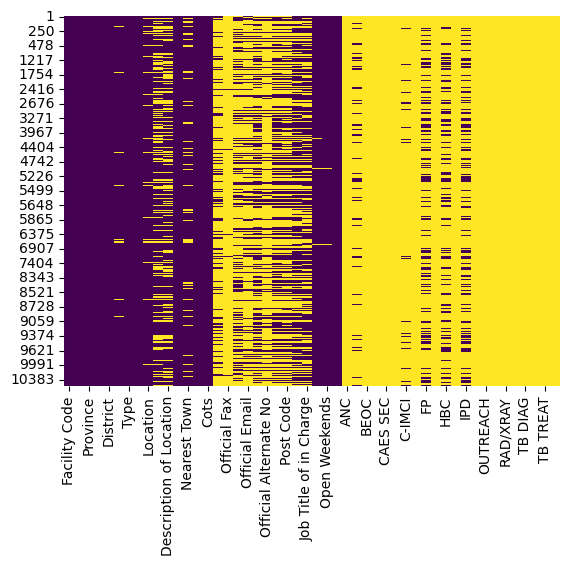

In [6]:
# visualize missing values
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [7]:
"""I need to understand whether this missing values are missing at random or not by looking at the distribution of data on the whole dataset"""
(data.isnull().sum()/len(data) * 100).sort_values(ascending=False)

YOUTH                      100.000000
CEOC                       100.000000
GROWM                      100.000000
BEOC                       100.000000
BLOOD                      100.000000
OPD                        100.000000
CAES SEC                   100.000000
HCT                        100.000000
OUTREACH                   100.000000
EPI                        100.000000
PMTCT                      100.000000
RAD/XRAY                   100.000000
RHTC/RHDC                  100.000000
TB DIAG                    100.000000
TB LABS                    100.000000
TB TREAT                   100.000000
ANC                        100.000000
Official Fax                94.859591
ART                         91.232746
Official Alternate No       90.937649
C-IMCI                      88.795812
Official Landline           86.987149
Official Email              82.322703
HBC                         73.365064
Official Mobile             72.251309
IPD                         62.465493
FP          

In [8]:
"""From our observation, we have identified columns with 100% of their information missing and others with over 70% missing data.
   The best approach for columns with no data at all is to drop them.We will also drop the 'province' and 'county' columns, as they
     are not necessary for our analysis."""

df.drop(columns=['ANC', 'BEOC',
       'CAES SEC','EPI', 'GROWM', 'HCT',
       'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG',
       'TB LABS', 'TB TREAT', 'YOUTH','BLOOD','CEOC','Province','County'],inplace = True)

In [9]:
#look at the distribution of data in the columns with a high number of missing values in both the main dataframe and the filtered dataframe

#distribution in the filtered dataframe
columns = df[['C-IMCI','ART','HBC','FP','IPD']]

value_counts = columns.apply(lambda x:x.value_counts())
print(value_counts)

#distribution in the main dataframe
columns_data = data[['C-IMCI','ART','HBC','FP','IPD']]

value_counts_data = columns_data.apply(lambda x:x.value_counts())
print(value_counts_data) 

   C-IMCI  ART  HBC   FP  IPD
Y      72  109  250  280  297
   C-IMCI  ART   HBC    FP   IPD
Y    1177  921  2798  4288  3943


In [10]:
"""From our observation Y, is an indication of the availability of the specified services while N represents their absense.
   Y in this case is the only unique value in the specified columns. The null values in the columns would be an indication of
  their absence.Therefore ill make an assumption that the values are missing at random and peform logical imputation by replacing 
  NAN values with N """

#fill null values
column = ['C-IMCI','ART','HBC','FP','IPD']
df.loc[:, column] = df.loc[:, column].fillna('N')

#assert changes
df[['C-IMCI','ART','HBC','FP','IPD']].isna().any()

C-IMCI    False
ART       False
HBC       False
FP        False
IPD       False
dtype: bool

In [11]:
"""no duplicated values"""
#check for duplicate values
df.duplicated().any() 


False

In [12]:
#closer look at other columns with missing values
col =df[['Open 24 Hours','Open Weekends']]

#unique values for open 24 hours column
hrs= df['Open 24 Hours'].unique()

#unique values for open weekends column
wkds=df['Open Weekends'].unique()

#count of unique values
counts= col.apply(lambda x:x.isna().sum())
counts,wkds,hrs

(Open 24 Hours    11
 Open Weekends     9
 dtype: int64,
 array(['Y', 'N', nan], dtype=object),
 array(['N', 'Y', nan], dtype=object))

In [13]:
"""The observation indicates that the unique values in this particular columns are either N,Y or NaN.We will make an assumption that
 the null values on this column indicate the absence of this services. Therefore we will make use of logical imputation and replace 
 all the null values with N"""

cols = ['Open 24 Hours','Open Weekends']

#fill null values
df.loc[:, cols] = df.loc[:,cols].fillna('N')

#assert there are no more null values
df[['Open Weekends','Open 24 Hours']].isna().any()

Open Weekends    False
Open 24 Hours    False
dtype: bool

In [14]:
#drop this columns as i shall not be needing them in my analysis. 
#dropping the sub location column as i can make use of the division column instead

df.drop(columns=['Official Alternate No','Official Landline','Official Email','Official Alternate No',
'Official Mobile','Official Address','Official Fax','Post Code','Description of Location','Town',
'Nearest Town','District','Sub Location'],inplace=True)

In [15]:
#drop all the null values as only a small % of data is null
df.dropna(subset=['Location', 'Division'], inplace=True)


In [16]:
#have a closer look at the in charge and job title column
from pandasql import sqldf
q1 = """SELECT [Job Title of in Charge],[In Charge] FROM df
        LIMIT 10"""
pysqldf  = sqldf(q1)
results = pysqldf
results

,Job Title of in Charge,In Charge
0,Clinical Officer,Caroline Achieng
1,Nursing Officer in Charge,Captain Murunga
2,Medical Superintendant,Dr Mbuthia Wacera
3,Doctor In Charge,Dr. Alma Okudo
4,Nursing Officer in Charge,None
5,Hospital Director,Dr Kamau David
6,Nursing Officer in Charge,Eunice Kamau
7,None,None
8,Nursing Officer in Charge,Stephanie Mutunga
9,Nursing Officer in Charge,Sarah Orinda


In [17]:
"""The information contained in these two columns is highly specific and cannot be reliably imputed without additional context. Ill only need the
Job Title In Charge Column for my analysis, therefore ill drop the in charge column and ignore the missing values in the job title column"""
#drop columns
df.drop(columns = 'In Charge',inplace = True)

In [18]:
#remove trailing spaces for all the rows
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

# convert all the rows to lowercase
df = df.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

In [19]:
# closer look at the location column
df['Location'].unique()

array(['huruma', 'mugumoini', 'woodly', 'central business district',
       'parklands', 'embakasi', "lang'ata", 'kasarani', 'roysambu',
       'upper savanna', 'pumwani', 'kangemi', 'githurai', 'central',
       'viwandani', 'ruaraka', 'kawangware', 'eastleigh north',
       'githunguri', 'kibera', 'bahati', 'kayole', 'kariokor', 'kilimani',
       'nairobi west', 'karen', 'pipeline', 'makadara', 'mukuru nyayo',
       'korogocho', 'njiru', 'community', 'dandora', 'kibra', 'landmawe',
       'eastleigh section i', 'uthiru/ruthimitu', 'ngando', 'city cenre',
       'ngara', 'kahawa west', 'nairobi south', 'mutuini',
       'jericho- lumumba', 'kwa njenga', 'woodley', 'golfcourse',
       'mathare', 'landi mawe', 'kiambiu', 'lumumba', 'lavington',
       'utawala', 'makina', 'pangani', 'maringo', 'langata',
       'wanyee road', 'l/kabete', 'ramesh gautama road', 'riruta',
       'kariobangi', 'umoja', 'laini saba', "sarang'ombe", 'makogeni',
       'kariobangi south', 'mukuru', 'sateli

In [20]:
#count of unique values
len(df['Location'].unique())

130

In [21]:
# rectifying the spelling errors on the location column

#correctly spell gthurai
df['Location'] = df['Location'].replace('gthurai','githurai')

#correctly spell makogeni
df['Location'] = df['Location'].replace('makogeni','makongeni')

#remove the dash in 'jericho- lumumba'
df['Location'] = df['Location'].replace('jericho-lumumba','jericho lumumba')
df['Location'] = df['Location'].replace('jericho- lumumba','jericho lumumba')

#correctly spell landmawe
df['Location'] = df['Location'].replace('landmawe' ,'landi mawe')

#remove the spacing in ' dandora '
df['Location'] = df['Location'].replace(' dandora ' , 'dandora')

#correctly spell city cenre and centre
df['Location']=df['Location'].replace('city cenre','city center')
df['Location'] = df['Location'].replace('city centre','city center')

# correctly spell 'parlands' parklands
df['Location'] = df['Location'].replace('parlands','parklands')

# correctly spell kitusuru
df['Location'] = df['Location'].replace('kitusuru','kitisuru')

#correctly spell rurak
df['Location'] = df['Location'].replace('ruarak','ruaraka')

# correctly spell khn
df['Location'] = df['Location'].replace('khn','knh')

# correctly spell mukuru kwanjega
df['Location'] = df['Location'].replace('mukuru kwanjega','mukuru kwanjenga')

#correctly spell 'kawagware'
df['Location'] = df['Location'].replace('kawagware','kawangware')

#correctly spell keyole
df['Location'] = df['Location'].replace('keyole','kayole')

#correctly spell kibera
df['Location']=df['Location'].replace('kibera','kibra')

# rewrite woodly
df['Location'] = df['Location'].replace('woodly','woodley')

# rewrite savanna
df['Location'] = df['Location'].replace('savanna','savannah')

#rewrite eastleigh section 111
df['Location'] = df['Location'].replace('eastleigh section 111','eastleigh section iii')

In [22]:
#assert changes. Initially there were 130 unique values
len(df['Location'].unique())

113

In [23]:
#have a closer look at the division column
df['Division'].unique()

array(['huruma', "lang'ata", 'woodly', 'starehe', 'parklands', 'embakasi',
       'kasarani', 'roysambu', 'embakasi east', 'pumwani', 'kangemi',
       'central', 'viwandani', 'kawangware', 'eastleigh north', 'ruai',
       'kibra', 'dagoretti', 'bahati', 'kariokor', 'kilimani', 'ruaraka',
       'mukuru', 'makadara', 'south b', 'kayole', 'njiru',
       'knh golf course', 'dandora', 'city centre', 'ngara',
       'eastleigh south', 'kileleshwa', 'riruta', 'kitisuru', 'langata',
       'kariobangi', "lan'gata", 'kariobangi south', 'dagoretti south',
       'savannah', 'nairobi south', 'westlands', 'karura',
       'eastleign south', 'dagoretti north', 'kibera', 'kitusuru',
       'kawagware', 'umoja', 'city square', 'woodley', 'kitsuru',
       'golf course', 'kasrani', 'mathare', 'waithaka', 'highridge',
       'knh/golf course', 'kamukunji', 'kenyatta', "sarang'ombe",
       'mutuini', 'embakasi kayole', 'rotysambu', 'embakasi west',
       'mukurui', 'lower kabete', 'mountain view',

In [24]:
# initial number of unique values
len(df['Division'].unique())

70

In [25]:
#rectify spelling mistakes on the division column

#correctly spell woodly
df['Division'] = df['Division'].replace('woodly','woodley')

#correctly spell lan'gata
df['Division'] = df['Division'].replace("lan'gata","lang'ata")

#correctly spell kitsuru and kitusuru
df['Division'] = df['Division'].replace(['kitsuru','kitusuru'],'kitisuru')

#correctly spell kibera
df['Division'] = df['Division'].replace('kibera','kibra')

#remove foward slash
df['Division'] = df['Division'].replace('knh/golf course','knh golf course')

#correctly spell kawagware
df['Division'] = df['Division'].replace('kawagware','kawangware')

#correctly spell roytsambu
df['Division'] = df['Division'].replace('rotysambu','roysambu')


In [26]:
#assert changes
len(df['Division'].unique())

62

In [27]:
# load population data frame
df_pop = pd.read_csv('population.csv')
df_pop.tail(12)

,"Distribution of Population by Sex, Number of Households, Land Area, Population Density and Sub County",Unnamed: 1,Unnamed: 2,Unnamed: 3
387,NAIROBI CITY,"4,397,073","2,192,452","2,204,376"
388,DAGORETTI,"434,208","217,651","216,526"
389,EMBAKASI,"988,808","492,476","496,270"
390,KAMUKUNJI,"268,276","136,670","131,599"
391,KASARANI,"780,656","381,234","399,385"
392,KIBRA,"185,777","94,199","91,569"
393,LANGATA,"197,489","96,698","100,774"
394,MAKADARA,"189,536","96,369","93,157"
395,MATHARE,"206,564","106,522","100,028"
396,NJIRU,"626,482","307,642","318,809"


In [28]:
#rename columns
df_pop.rename(columns={
    'Distribution of Population by Sex, Number of Households, Land Area, Population Density and Sub County': 'Constituency',
    'Unnamed: 1': 'Total Population',
    'Unnamed: 2': 'Male',
    'Unnamed: 3': 'Female'
}, inplace=True)

In [29]:
#standardize all names to lowercase
df_pop = df_pop.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

In [30]:
#filter only population info for nairobi
new_df_pop = df_pop[-12:]

In [31]:
"""constituencies in the health facilities df are named differently from those in population df. Additionally population data for ruaraka
 constituency is missing in population df and the health facilities df doesnt have the njiru constituency column"""

# combine similar constituencies
df_filtered = df[['Type', 'Facility Name', 'Owner', 'Constituency']]

new_df = df_filtered['Constituency'] = df_filtered['Constituency'].replace({
    'embakasi west': 'embakasi',
    'embakasi central': 'embakasi',
    'embakasi south': 'embakasi',
    'embakasi north': 'embakasi',
    'embakasi east': 'embakasi',
    'dagoretti north': 'dagoretti',
    'dagoretti south': 'dagoretti',
     "lang'ata" : 'langata'
})

# merge df_filtered with df_pop based on constituency column
combined_df = pd.merge(df_filtered, new_df_pop, on='Constituency', how='inner')

# Print the combined dataframe
combined_df.head()

,Type,Facility Name,Owner,Constituency,Total Population,Male,Female
0,medical clinic,st jude's huruma community health services,private practice - unspecified,mathare,"206,564","106,522","100,028"
1,health centre,7kr mrs health centre,armed forces,langata,"197,489","96,698","100,774"
2,medical clinic,aar adams health centre,private practice - general practitioner,kibra,"185,777","94,199","91,569"
3,medical clinic,aar city centre clinic,private enterprise (institution),starehe,"210,423","109,173","101,238"
4,medical clinic,aar clinic sarit centre (westlands),private enterprise (institution),westlands,"308,854","153,818","155,021"


In [32]:
# change float dtypes to int
df[['Beds','Cots']]=df[['Beds','Cots']].astype(int)

# ANALYSIS


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# calculate the percentage of 'ART' for each 'Type' category
art_percent = df.groupby(['Type', 'ART'])['ART'].count().unstack('ART').apply(lambda x: x / x.sum() * 100, axis=1)
art_percent.sample(3)

ART,n,y
Type,,
district hospital,33.333333,66.666667
maternity home,80.000000,20.000000
national referral hospital,50.000000,50.000000


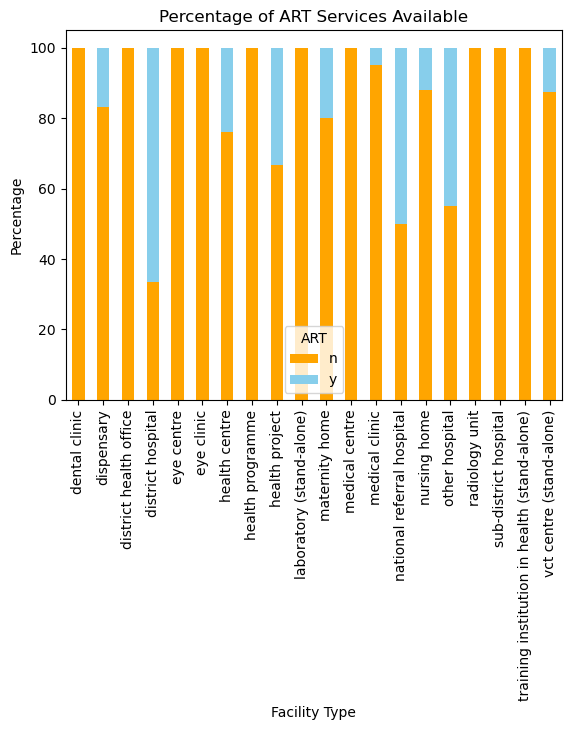

In [35]:
# plot percentages
art_percent.plot(kind='bar', stacked=True, color=['orange', 'skyblue'])

# Set title and labels
plt.title('Percentage of ART Services Available')
plt.xlabel('Facility Type')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()


- District hospitals have the most availability of ART services
- Medical clinics have the least availability of ART services
- No medical center offers ART services

In [36]:
# observe the number of referral hospitals and radiology units
df[(df['Type']=='national referral hospital') | (df['Type'] == 'radiology unit')]


,Facility Code,Facility Name,Division,Type,Owner,Location,Constituency,Beds,Cots,Job Title of in Charge,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD
2435,13023,kenyatta national hospital,kibra,national referral hospital,ministry of health,golfcourse,kibra,1455,427,hospital director,y,y,operational,y,y,y,y,y
7402,13194,national spinal injury hospital,kilimani,national referral hospital,ministry of health,kilimani,dagoretti north,30,0,medical superintendant,y,y,operational,n,y,n,y,n
8443,19353,plaza x-ray services (re-insurance plaza-nairobi),central,radiology unit,private enterprise (institution),central,starehe,0,0,doctor in charge,n,y,operational,n,n,n,n,n


- There are two referral hospitals and one radiology unit

In [37]:
# Filter medical facilities to get information on nursing homes only

nursing = df[df['Type'] == 'nursing home']
filtered_nursing =nursing[['Open 24 Hours','Open Weekends','ART','FP','Beds','Facility Name','Operational Status']]
filtered_nursing.sample(3)

,Open 24 Hours,Open Weekends,ART,FP,Beds,Facility Name,Operational Status
6445,y,y,n,y,8,alice nursing home,operational
3631,n,n,n,n,11,kilimanjaro nursing home,operational
26,y,y,n,y,40,afwan medical centre,operational


- There are 25 nursing homes in Nairobi

In [38]:
# Filter medical facilities to get information on vct centers only
vct = df[df['Type'] == 'vct centre (stand-alone)']
filtered_vct=vct[['Open 24 Hours','Open Weekends','ART','FP','Beds','Facility Name','Operational Status','IPD']]
filtered_vct.sample(3)

,Open 24 Hours,Open Weekends,ART,FP,Beds,Facility Name,Operational Status,IPD
2842,n,n,n,n,0,ministry of education (moest) vct centre,operational,n
6486,n,n,n,n,0,adventist centre for care and support (kilimani),operational,n
7240,n,y,n,n,0,mysa vct,operational,n


- There are 56 VCT centers

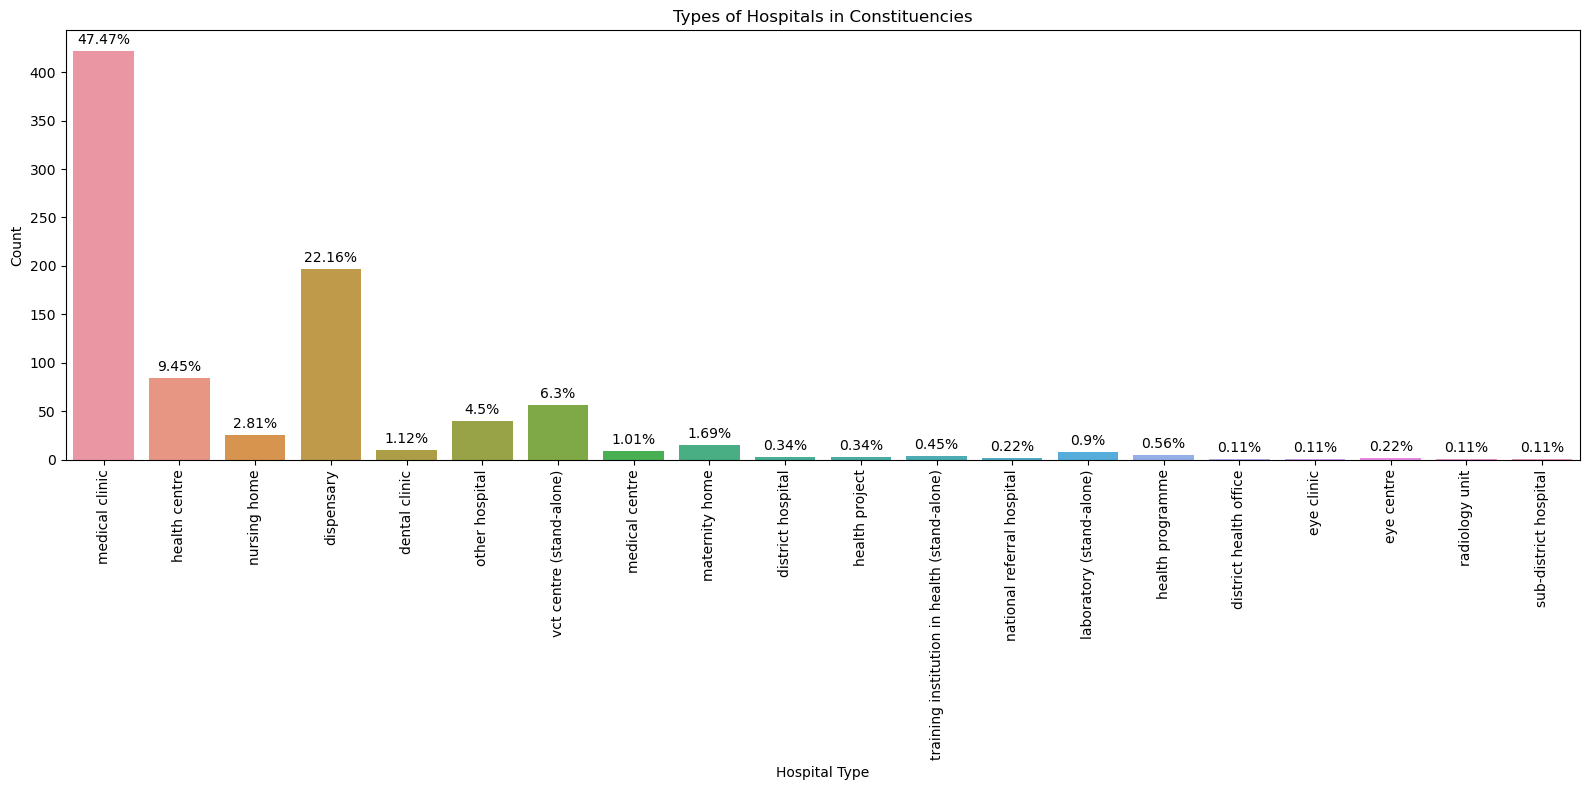

In [39]:
#visualize % distribution of the type of health centers across nairobi

# create bar plot
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Type', data=df)

# percentages and anonnate
total = len(df)
for bar in ax.patches:
    height = bar.get_height()
    percentage = (height/total * 100).round(2)
    ax.annotate(f'{percentage}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center',
                va='bottom')

plt.title('Types of Hospitals in Constituencies')
plt.xlabel('Hospital Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Medical clinics are the most common types of medical facilities in Nairobi accounting for 47.47% of the total number of facilities in the county followed by dispensaries at 22.16%.
- Sub-districts hospitals,eye clinics,district health offices and radiology units are the least common health facilities with a percentage of 0.11%.

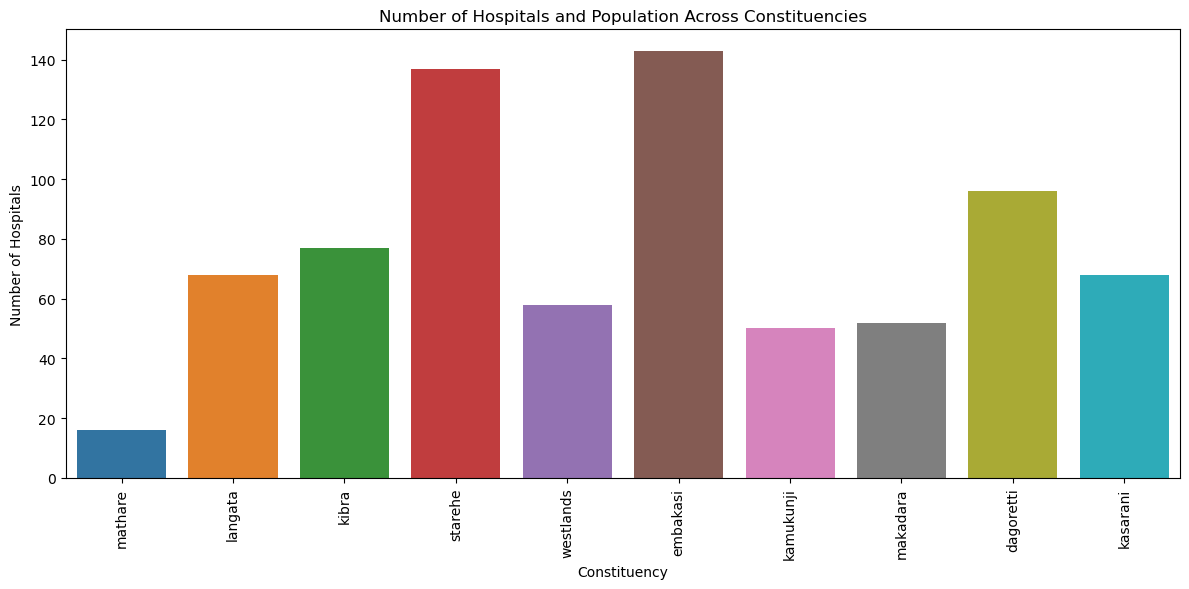

In [40]:
# Distribution of facilities across constituencies

# Plot count plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Constituency', data=combined_df)
# set title and labels
plt.title('Number of Hospitals and Population Across Constituencies')
plt.xlabel('Constituency')
plt.ylabel('Number of Hospitals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- Embakasi has the highest number of medical facilities followed by starehe.
- Despite having the largest population,kamukunji has a very low number of medical facilities
- Mathare has the lowest distribution of medical facilities

In [41]:
#Distribution of medical facilites in specified constituencies

q5 = """
SELECT Type, COUNT(*) AS count, Constituency
FROM combined_df
WHERE Constituency = 'mathare'
GROUP BY Type
"""
pysqldf = sqldf(q5)
results4 = pysqldf
results4.sample(3)


,Type,count,Constituency
4,nursing home,2,mathare
2,medical centre,1,mathare
5,other hospital,1,mathare


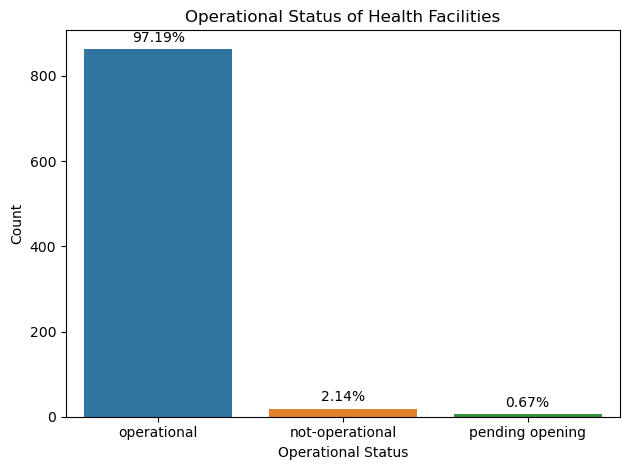

In [42]:
#Status of operation of the health facilities"""

#plot
ax1 = sns.countplot(x='Operational Status', data=df)

# calculate percentages and annotate
total = len(df['Operational Status'])
for bar in ax1.patches:
    height = bar.get_height()
    percentage = (height/total * 100).round(2)
    ax1.annotate(f'{percentage}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center',
                va='bottom')
ax1.set_title('Operational Status of Health Facilities')
ax1.set_xlabel('Operational Status')
ax1.set_ylabel('Count')
plt.tight_layout()

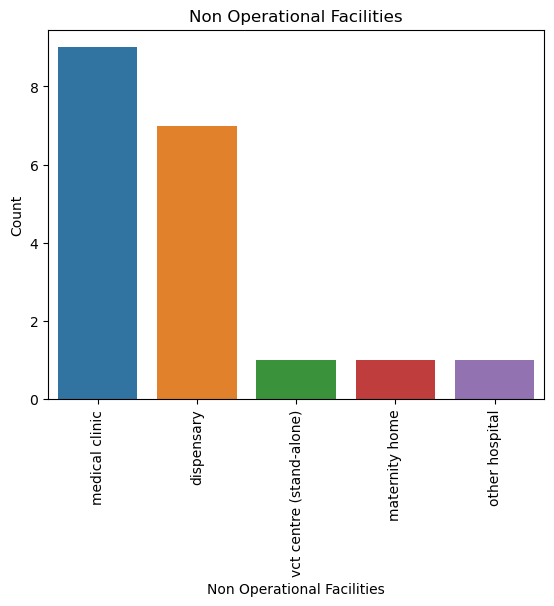

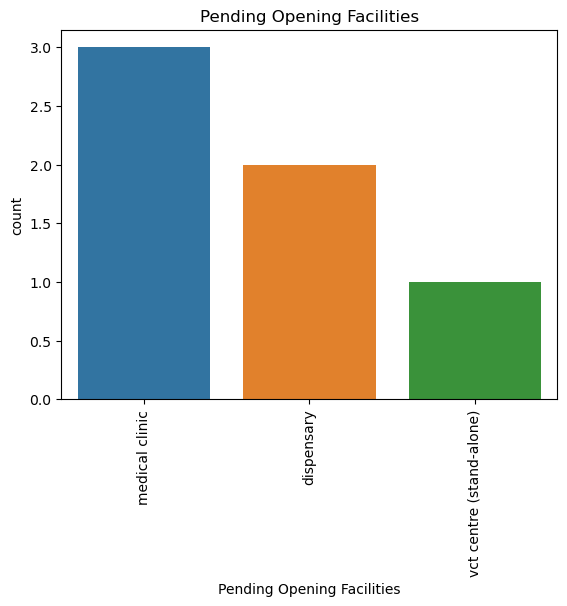

In [43]:
#plot non operational facilities
v = df[df['Operational Status']== 'not-operational']
sns.countplot(data = v,x ='Type')
plt.xlabel('Non Operational Facilities')
plt.ylabel('Count')
plt.title('Non Operational Facilities')
plt.xticks(rotation=90)

plt.show()
#plot pending opening facilities
w = df[df['Operational Status']== 'pending opening']
sns. countplot(data = w,x ='Type')
plt.xlabel('Pending Opening Facilities')
plt.title('Pending Opening Facilities')
plt.xticks(rotation=90)

plt.show()

- 97.17% of the facilities are operational. The highest number of operational facilities being medical clinics and the least being district hospitals

- 2.14% of the facilities are not operational. The highest number of non operational facilities are medical clinics.

- 0.67% of the facilities are pending open. The most pending open facilities are medical clinics and the least pending open facilites are VCT stand alone centers

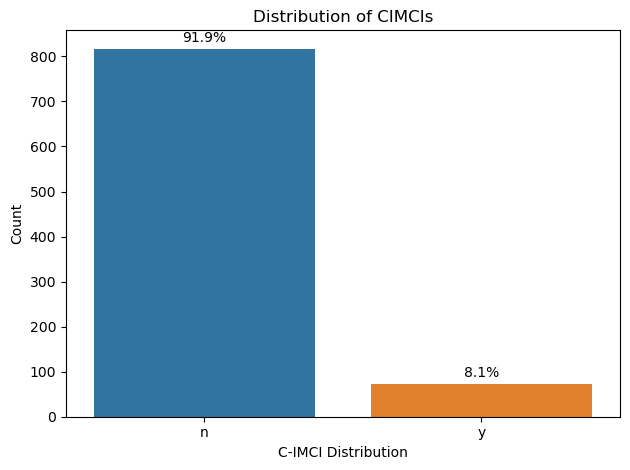

In [44]:
# Visualize the availability of C-IMCI services in facilities

ax2= sns.countplot(x='C-IMCI', data=df)
total = len(df['C-IMCI'])
for bar in ax2.patches:
    height = bar.get_height()
    percentage = (height/total * 100).round(2)
    ax2.annotate(f'{percentage}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center',
                va='bottom')
ax2.set_title('Distribution of CIMCIs')
ax2.set_xlabel('C-IMCI Distribution')
ax2.set_ylabel('Count')
plt.tight_layout()

- From our observation, 91.9% of the medical facilities in nairobi  do not provide C-IMCIs services. 

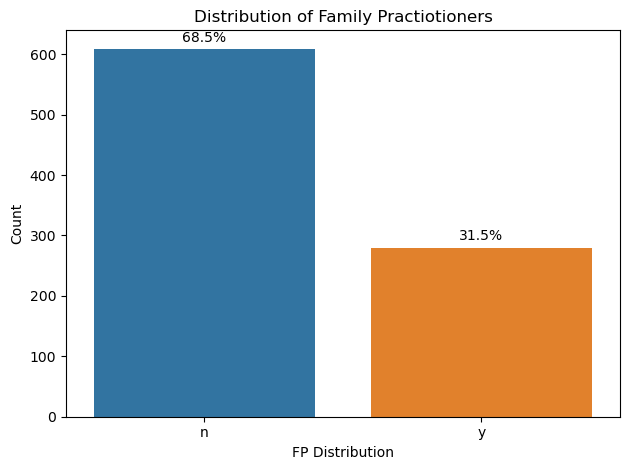

In [45]:
# visualize the availability of family practitioners
ax3 = sns.countplot(x='FP', data=df)
total = len(df['FP'])
for bar in ax3.patches:
    height = bar.get_height()
    percentage = (height/total * 100).round(2)
    ax3.annotate(f'{percentage}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center',
                va='bottom')
ax3.set_title('Distribution of Family Practiotioners')
ax3.set_xlabel('FP Distribution')
ax3.set_ylabel('Count')
plt.tight_layout()

*A family practitioner, also known as a family physician or family doctor, is a medical doctor who specializes in comprehensive healthcare for people of all ages.*

- From our observation,only 68.5% of the total facilities in Nairobi do not have access to a family practitioner

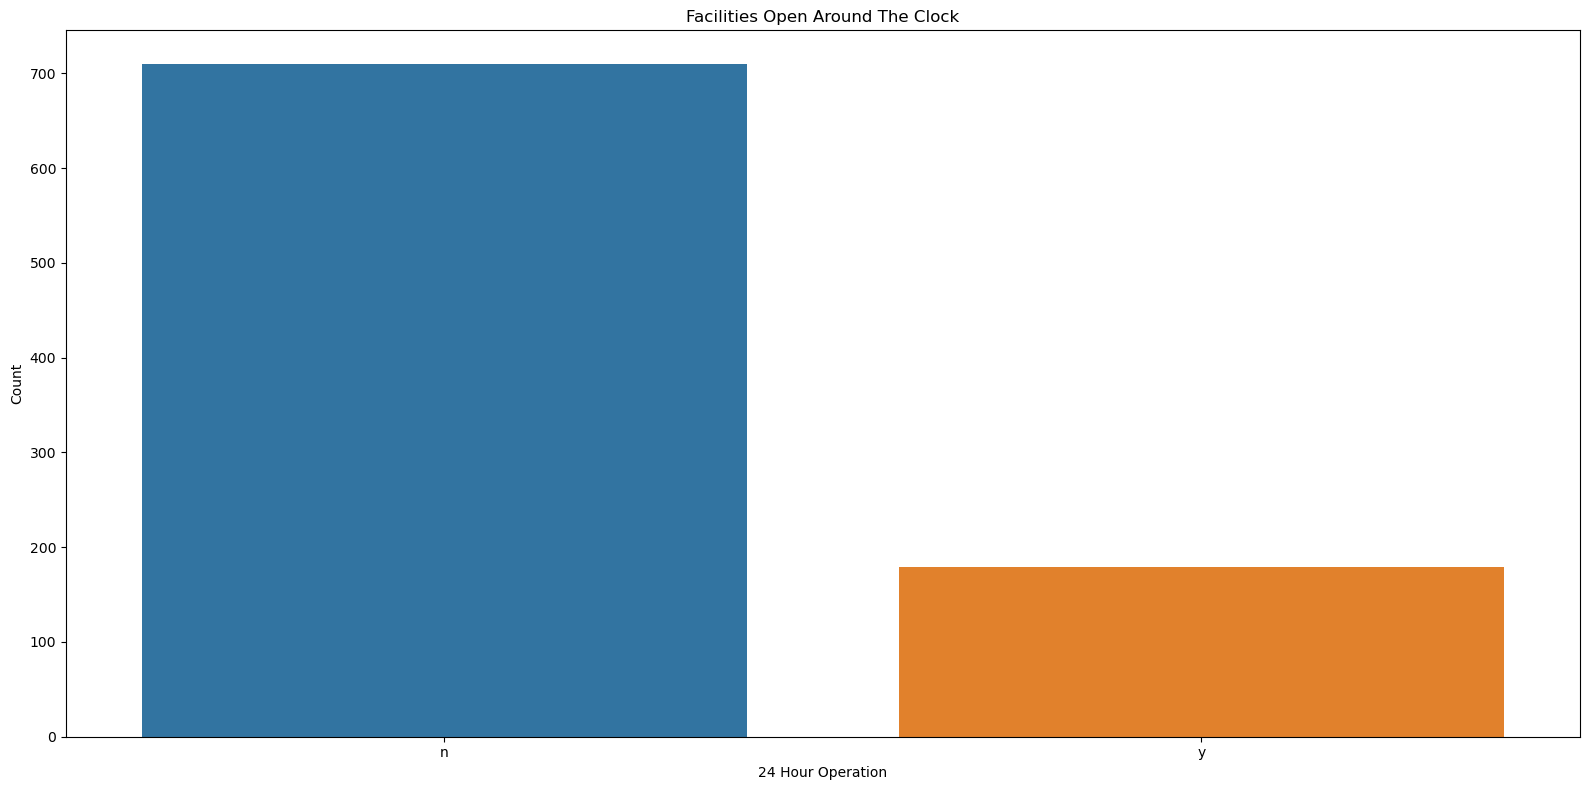

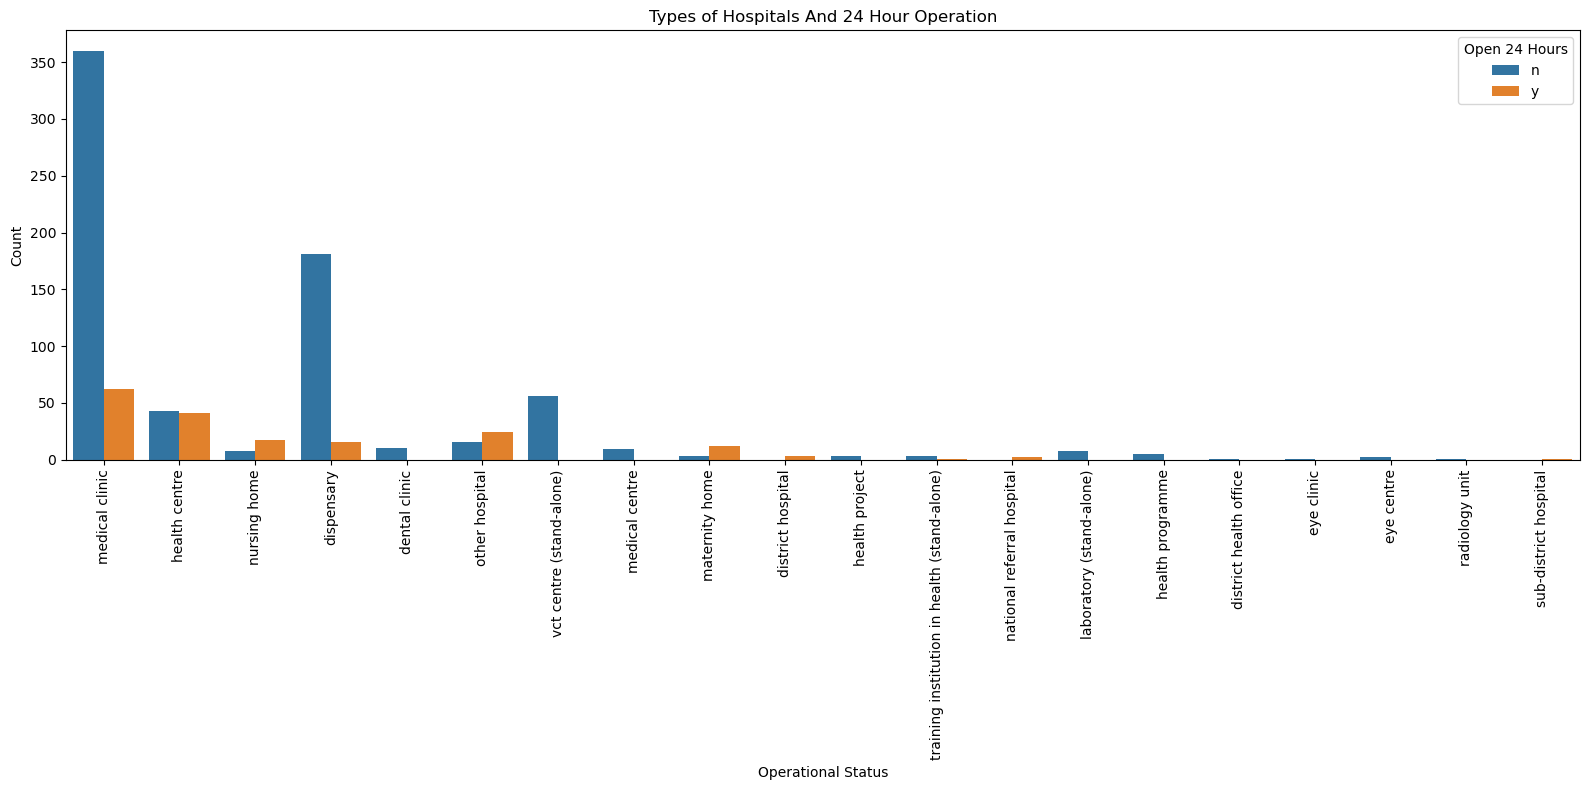

In [46]:
#how many hospitals are open 24hours

#first plot
plt.figure(figsize=(16, 8))

ax1 = sns.countplot(x='Open 24 Hours', data=df)
ax1.set_title('Facilities Open Around The Clock')
ax1.set_xlabel('24 Hour Operation')
ax1.set_ylabel('Count')
plt.tight_layout()

# second plot with the 'Type' as the x-axis and 'Open 24 Hours' as the hue
plt.figure(figsize=(16, 8))
ax2 = sns.countplot(x='Type', hue='Open 24 Hours', data=df)
ax2.set_title('Types of Hospitals And 24 Hour Operation')
ax2.set_xlabel('Operational Status')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()

plt.show()


- From our observation, most facilities are not open around the clock. Nursing homes, district hospitals,other hospitals,maternity homes, and referral hospitals are the only facilities that operate around the clock more frequently than they are closed.


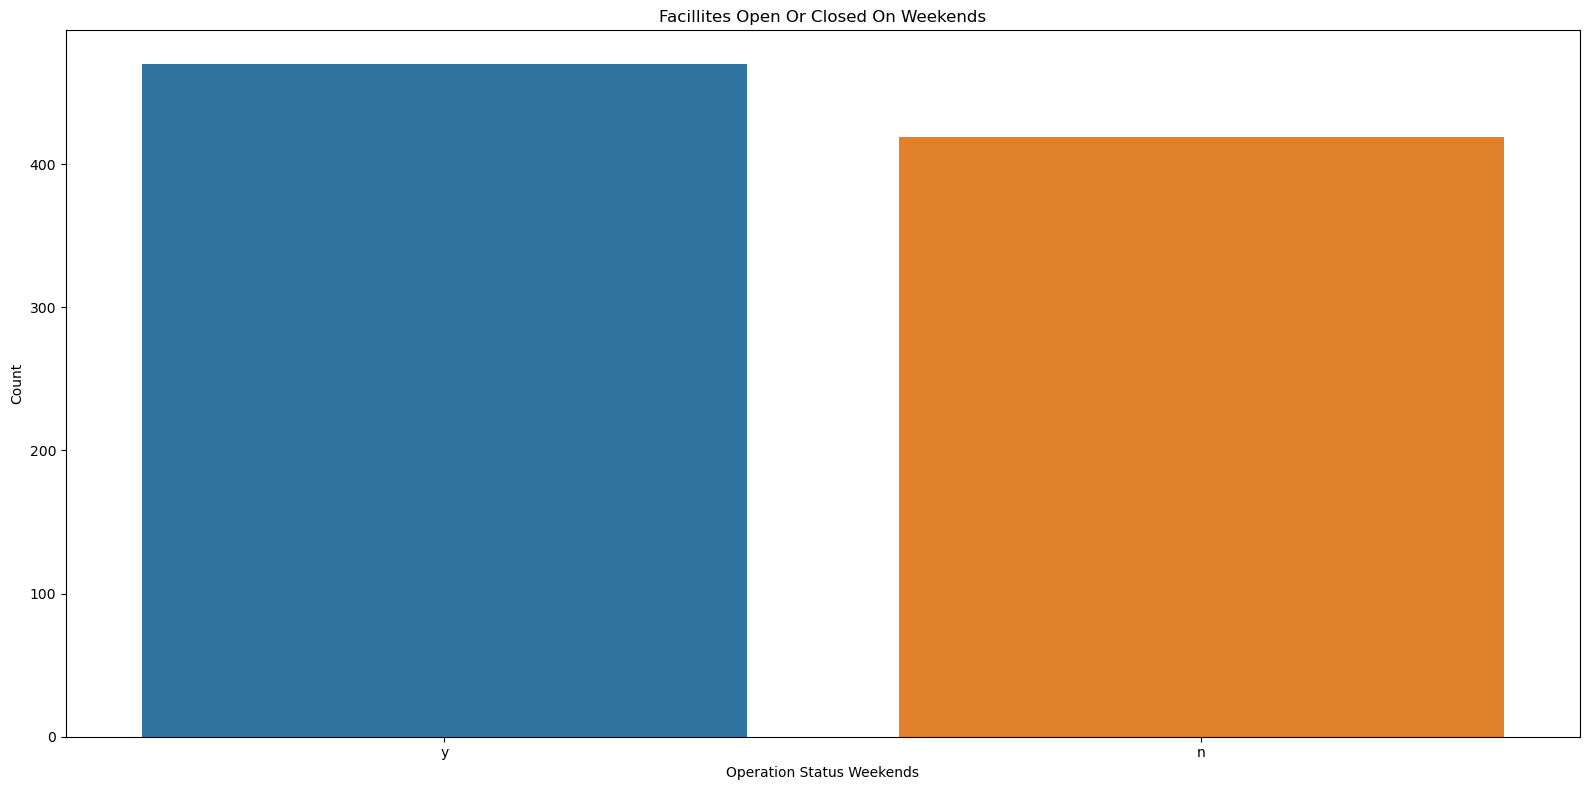

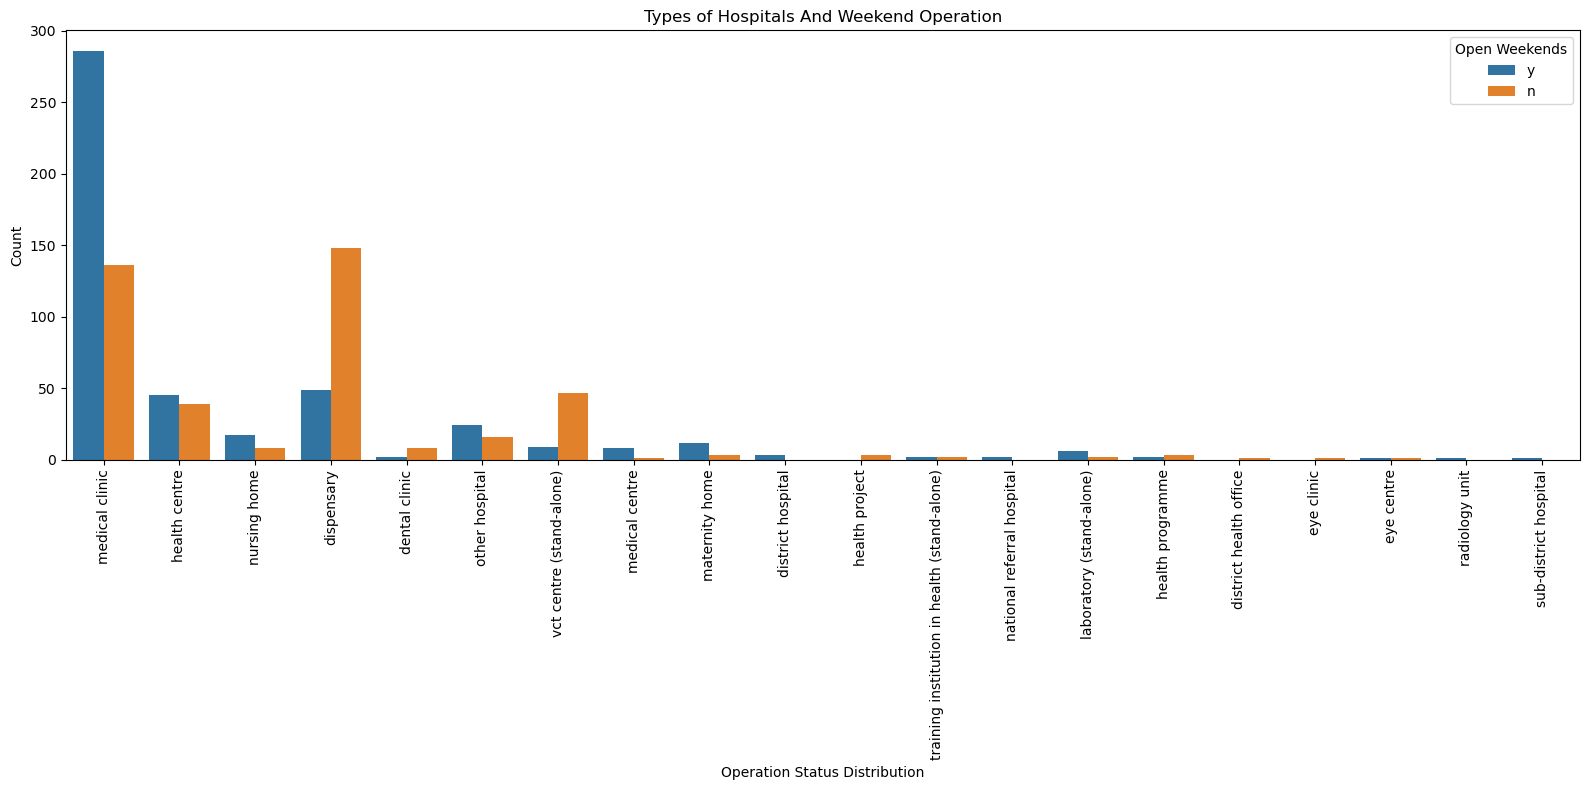

In [47]:
#how many hospitals are open on weekends

#first plot
plt.figure(figsize=(16, 8))
ax1 = sns.countplot(x='Open Weekends', data=df)
ax1.set_title('Facillites Open Or Closed On Weekends')
ax1.set_xlabel('Operation Status Weekends')
ax1.set_ylabel('Count')
plt.tight_layout()

#second plot with the 'Type' as the x-axis and 'Open Weekends' as the hue
plt.figure(figsize=(16, 8))
ax2 = sns.countplot(x='Type', hue='Open Weekends', data=df)
ax2.set_title('Types of Hospitals And Weekend Operation')
ax2.set_xlabel('Operation Status Distribution')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()

plt.show()


- From our observation, dispensaries are the facilities that are mostly open on weekends than they are closed
 
- Other facilities that are open on weekends more often than they are closed include dental clinics,vct centers,health projects,eye clinics and district health offices


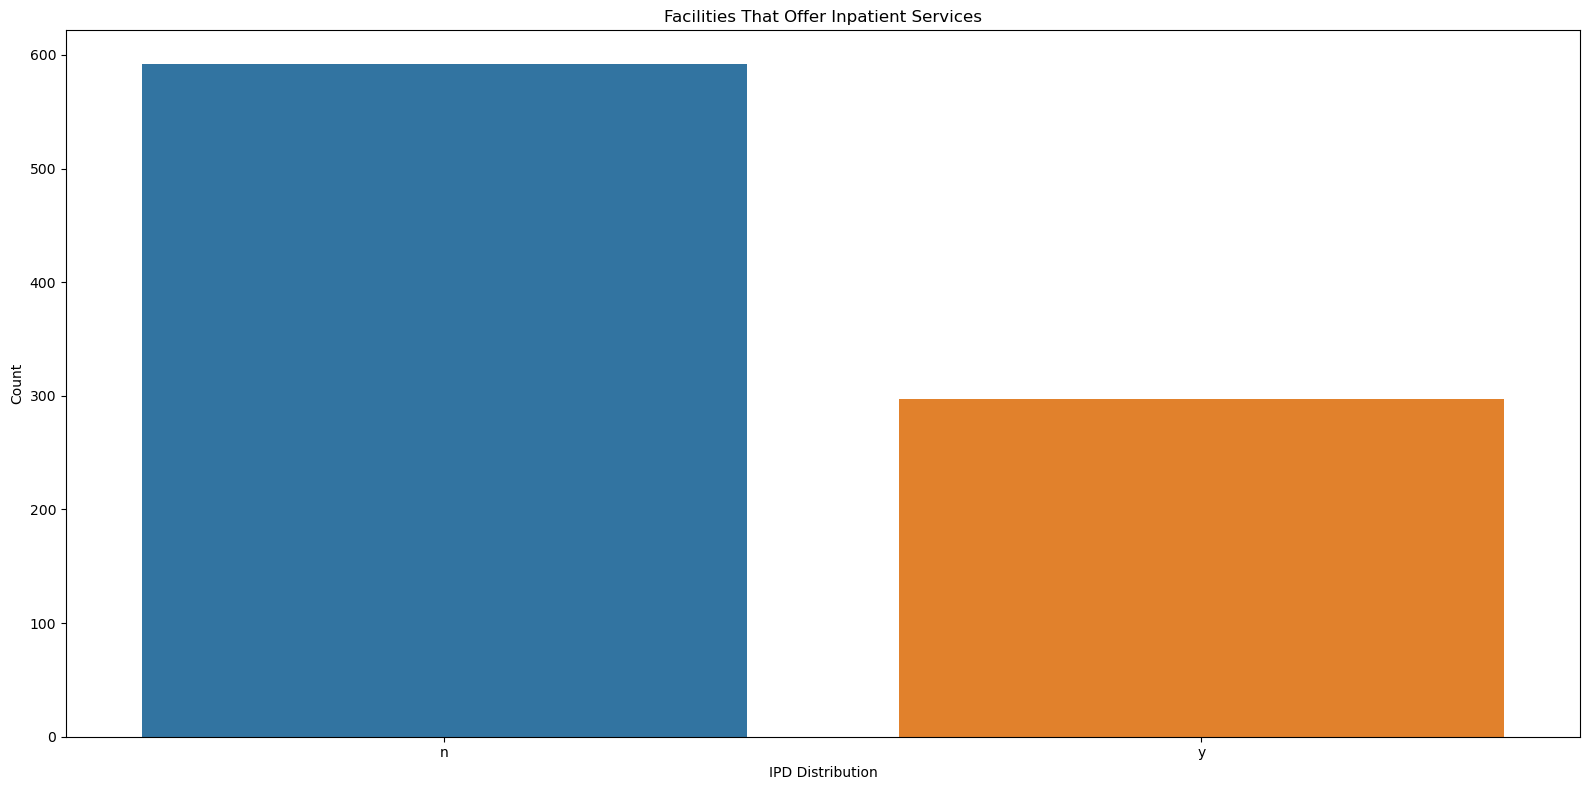

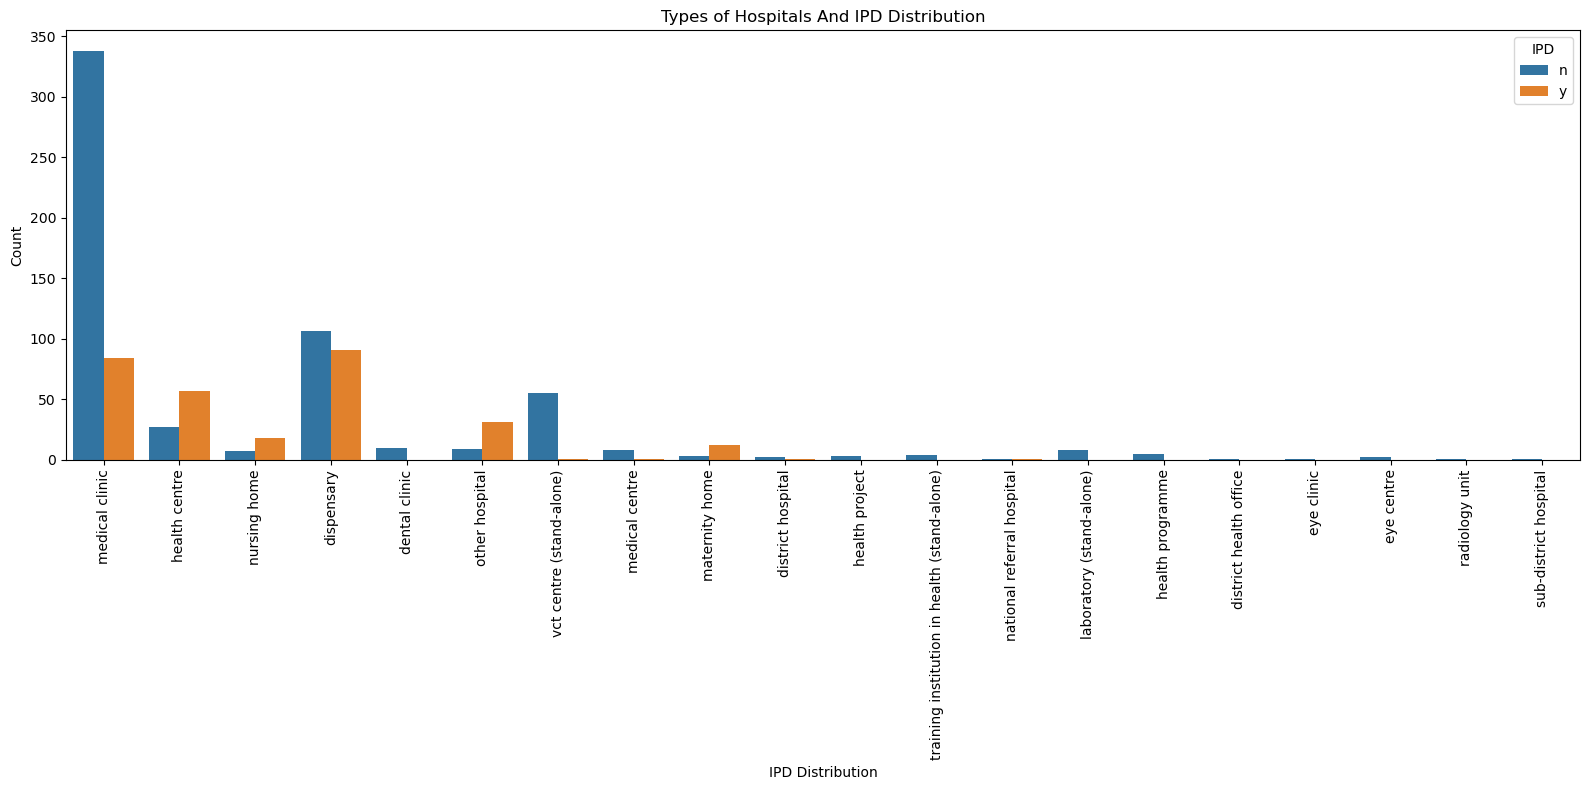

In [48]:
#how many hospitals have inpatient services

plt.figure(figsize=(16, 8))
ax1 = sns.countplot(x='IPD', data=df)
ax1.set_title('Facilities That Offer Inpatient Services')
ax1.set_xlabel('IPD Distribution')
ax1.set_ylabel('Count')
plt.tight_layout()

#second plot with the 'Type' as the x-axis and 'IPD' as the hue
plt.figure(figsize=(16, 8))
ax2 = sns.countplot(x='Type', hue='IPD', data=df)
ax2.set_title('Types of Hospitals And IPD Distribution')
ax2.set_xlabel('IPD Distribution')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()

plt.show()


- Health Centers , Other Hospitals , Nursing Homes and Maternity Homes offer IPD services more frequently than they don't
- A significant percentage of medical clinics do not offer IPD services.

- District health office , eye clinics , eye centers and radiology units do not offer any IPD services which is in alignment with the nature of services they offer

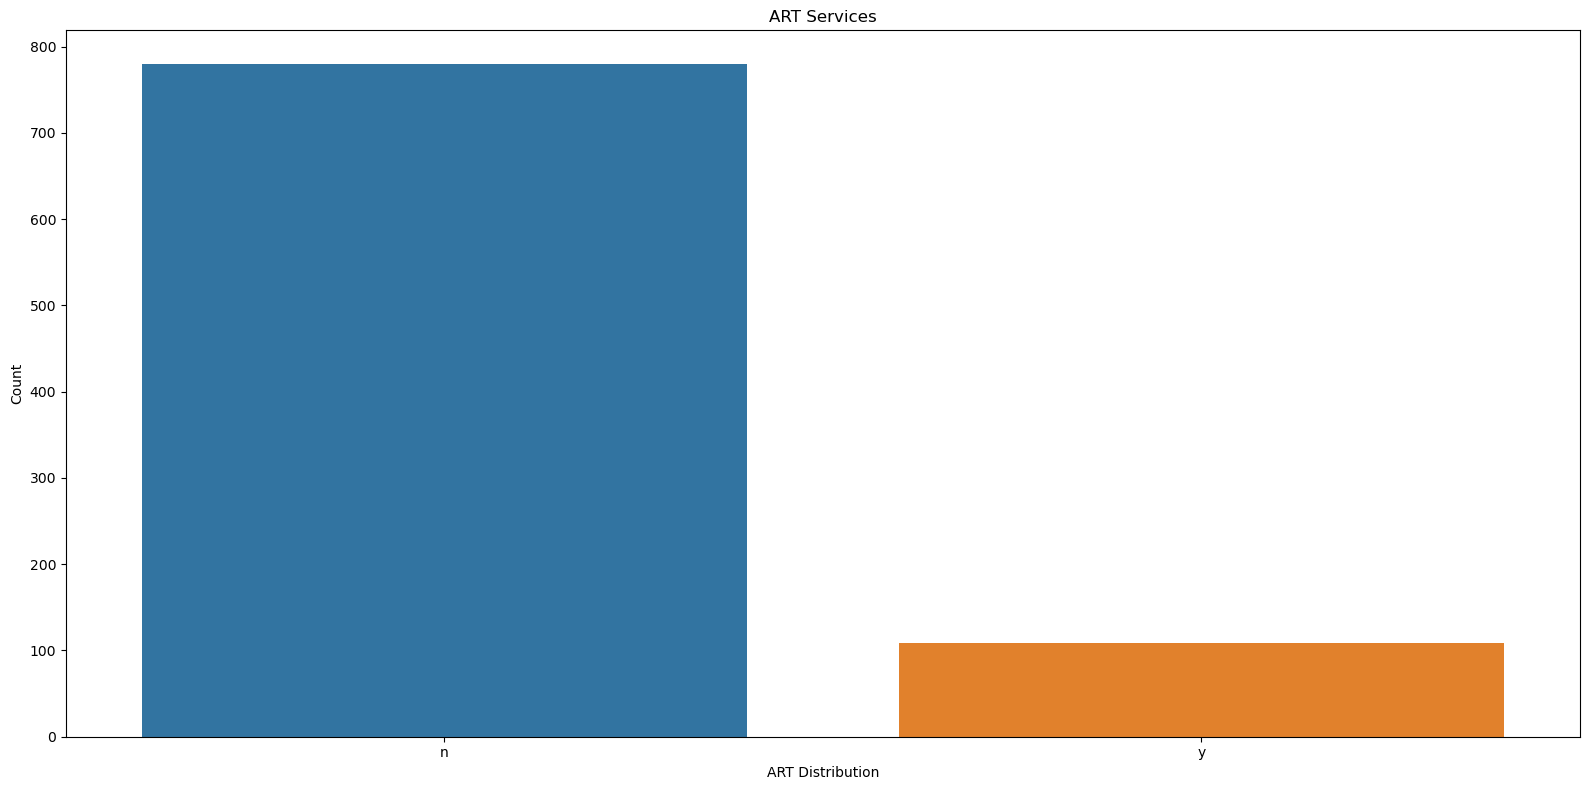

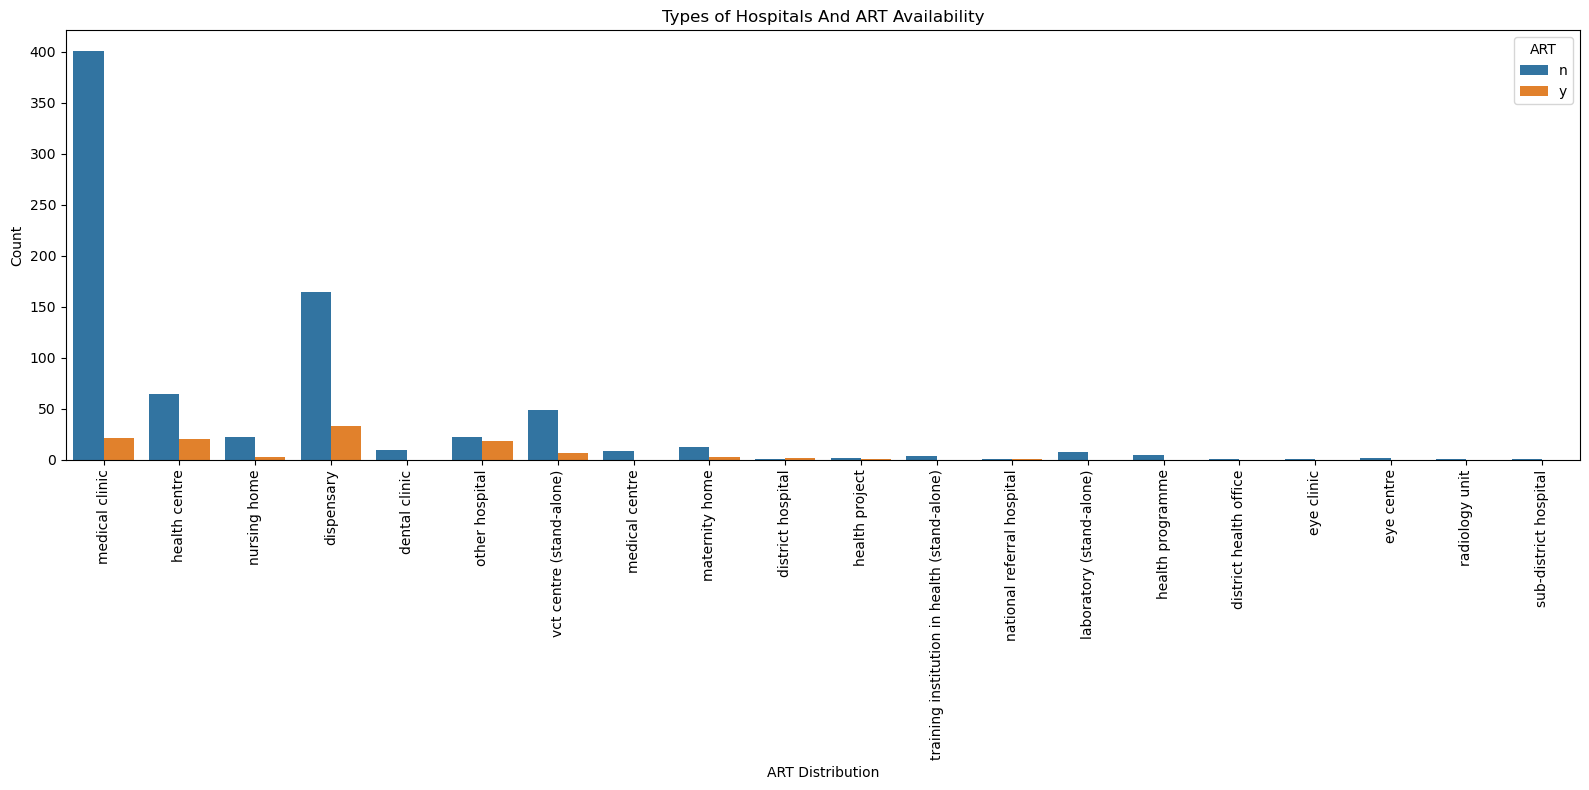

In [49]:
#how many hospitals have ART services

plt.figure(figsize=(16, 8))
ax1 = sns.countplot(x='ART', data=df)
ax1.set_title('ART Services')
ax1.set_xlabel('ART Distribution')
ax1.set_ylabel('Count')
plt.tight_layout()

# Create the second plot with the 'Type' as the x-axis and 'Open 24 Hours' as the hue
plt.figure(figsize=(16, 8))
ax2 = sns.countplot(x='Type', hue='ART', data=df)
ax2.set_title('Types of Hospitals And ART Availability')
ax2.set_xlabel('ART Distribution')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()

plt.show()


- Health facilties do not offer ART services as frequently as they should

In [50]:
# Distribution of  personnel in charge based on job title
value = df['Job Title of in Charge'].value_counts()
len_df = len(df['Job Title of in Charge'])
percentage = (value / len_df) * 100  

percentage = percentage.round(2)

print(f'Percentage: {percentage}')
print(f'Frequency: {value}')

Percentage: Job Title of in Charge
nursing officer in charge    33.07
clinical officer             14.40
hospital director             5.85
doctor in charge              3.37
medical superintendant        2.81
Name: count, dtype: float64
Frequency: Job Title of in Charge
nursing officer in charge    294
clinical officer             128
hospital director             52
doctor in charge              30
medical superintendant        25
Name: count, dtype: int64


- Majority of the people in charge of the facilities are nursing officers incharge, with a frequency of 294, constituting  33.07% of all positions

- Clinical officers are the second most personnel in charge of the health facilities with a frequency of 128, constitutinf 14.40% of all positions

- Medical superintendent are the least personnel in charge with a frequency of 25, constituting 2.81% of all positions

*It is important to note that the percentages and frequencies are derived from data whose null values were left unfilled due to the sensitivity of this information.Therefore this values may change in the event of updated or revised data*

# OBSERVATIONS AND RECOMMENDATIONS

### National Referral Hospitals (0.22%)

#### **observations**
*There are only two referal hospitals, The kenyatta National Hospital and The National Spinal Injury Hospital.*
- Kenyatta National Hospital is the biggest hospital in Kenya. From our observation it only has a bed capacity of 1455 plus 427 cots. 

- The National Spinal Injury Hospital is  a hospital that specializes in spinal injuries. We observe that it only has a bed capacity of 30 and does not offer any in patient services

#### **recommendations**
- There is a significant need to increase the bed in the referrals hospital. This will allow the hospitals to accommodate more patients requiring specialized care.

- Despite its specialization, the National Spinal Injury Hospital does not currently offer inpatient services. Introducing comprehensive inpatient services will ensure that patients receive continuous and specialized care, which is crucial for recovery from spinal injuries. 

**All this can be implemented through adequate funding and resource allocation. This can be achieved through increased government funding, private sector investments, and international aid and grants.**


### Radiology Facilities(0.11%)

#### **observations**
- The only available Radiology Unit is The Plaza X-Ray Services that specializes in imaging procedures such as Xrays,Ct Scans and Ultra Sounds

#### **recommendations**
There is a need to increase the number of radiology units in the county to ensure easy access to these services

### Nursing Homes Overview (2.81%)

*There are 25 nursing homes in Nairobi, accounting for 2.81% of the total health facilities.*

#### **observations**

*Operational Hours*

- 17 nursing homes operate 24 hours a day, while 8 do not.
- 17 nursing homes are open on weekends, while 8 are not.

*Service Offerings*

- Only 3 nursing homes offer antiretroviral support (ART).
- 17 nursing homes have a family practitioner (FP), while 8 do not.

*Open 24 Hours and/or Weekends*

- 16 nursing homes are open 24 hours and on weekends.
- One nursing home operates 24 hours but does not open on weekends.
- One nursing home opens on weekends but not 24 hours.
- Seven nursing homes neither operate on weekends nor round the clock.

*Bed Capacity*

- Five facilities have a bed capacity of more than 30.
- 15 facilities have a bed capacity of less than 20.

#### **recommendations**
- More nursing homes should offer ART services,making this services more accessible. This helps to reduce the prevalance of HIV/AIDS and improves the health of those already living with HIV

- More nursing homes should increase their bed capacity to accomodate more patients,improving the quality of care provided to patients

- More nursing homes should offer around the clock care. This increases accessibility to patients that may require medical attention any time of the day.

### VCT Centers Overview

*VCT (Voluntary Counseling and Testing) centers primarily focus on providing HIV testing and counseling services, accounting for 6.3% of healthcare facilities.*

#### **observations**
*Operational Hours*
- No VCT Centers operate around the clock
- 47 VCT Centers do not on weekends
- 9 VCT Centers are open on weekends

*ART Services*
- 49 centers do not offer ART services.
- 7 centers offer ART services.

*Inpatient Facilities*

- Only One center offers inpatient facilities.

*Bed Capacity*
- Only two ceters have bed capacities. 
- A bed capacity of  (350) by Pumwani Maternity VCT Centre and (40) by Kemri VCT

#### **recommendations**

 *Operation Hours*
 - More VCT Centers should extend their operation hours especially on weekends to accomodate people who may find it diffcult to access their services during regular work hours.This ensures people can get access to medical attention at whatever time of the week

 - More VCT Centers should consider offering 24 hour support to accomodate individuals with day time committments. This can be done by adequate staffing and providing infracturcture that allows for around the clock quality support 
 
*Intergrated Services*
- VCT Centers should consider offering more services beyond HIV testing and counselling like offering antiretroviral therapy to infected patients. This helps in ensuring continuity of care,ultimatley improving the health of people living with HIV

- VCT Centers should consider offering inpatient services to individuals following diagnosis. This can act as short term care or temporary accommodation to patients that may be in need of those services. This ensures quick intervention if necessary and prompt treatment of individuals within the same facility.

-  Transform VCT Centers from counselling and testing facilities to facilities that offer every kind of support to the diverse needs of individuals living with HIV. This helps to improve access to healthcare services.

### ART

#### **observations**
*According to a 2018 report on HIV/AIDS by the ministry of health, Nairobi ranked  6th with one of the highest prevalance of HIV in the country with a percentage of (6.1%)*

*It also ranked first as the county with the highest annual number of HIV infections (2,587) among the youth and second among children with (660) annual infections*

*Nairobi ranked first with the highest number of annual HIV related deaths annually (2,232)*

-  From our available data 67% of district hospitals offer ART services. 
- Only 23% of health centers offer ART services
- No medical center,all of which are owned by NGOs offers ART services.
- Only 12% of Nursing Homes offer ART services.
- Only 5% of Medical clinics,which are privatley owned offer ART services.
- District Hospitals Rank Highest with availability of ART services with 67% followed by other hospitals with 45%
- Only 20% of maternity homes offer ART services

#### **recommendations**

*Creating Awarness*
- There should be training programs and awareness campaigns for healthcare providers in medical clinics, nursing homes, and health centers about the importance of ART services in HIV/AIDS management. This could include workshops, seminars, and educational materials.

*NGOs*
- NGOs that operate medical centers should include ART services in their healthcare programmes

*Monitoring and Evaluation* 
- Establish mechanisms for monitoring and evaluating the provision of ART services across different types of healthcare facilities. Regular assessment can help identify gaps and also targeted interventions can help to improve service delivery.

*Policies*
- Advocate for policies that emphasize the need for for ART services in facilities that cater to the needs of vulnerable people like nursing homes and maternity homes.

**By implementing this recommendations we can be able to improve access to ART services ultimatley contributing to the managment of HIV infections and deaths in Nairobi**

### Hospital Distribution Among Constituencies

#### **observations**


*Kamukunji and Dagoretti have the highest populations (988,808)*. 

Below is a distribution of the health facilities in these constituencies.

#### Kamukunji
*Kamukunji has a total of 50 health facilities*
  - 2 other hospitals and 2 VCT stand-alone centers
  - 19 medical clinics
  - 1 health project and 1 maternity home
  - 5 health centers
  - 11 nursing homes

#### Dagoretti
*Dagoretti has a total of 96 health facilities*
  - 35 dispensaries
  - 5 other uncategorized hospitals
  - 9 VCT centers
  - 1 referral hospital, 1 dental clinic, 1 health programme, 1 medical center, and 1 training institution
  - 18 health centers
  - 24 medical clinics

### Starehe

*Despite having a population of 185,777, Starehe has one of the highest distributions of medical facilities.*
- 9 dental clinics
- 23 dispensaries
- 2 eye centers and 2 health centers
- 1 radiology clinic and 1 eye clinic
- 7 stand-alone labs
- 5 medical centers and 5 uncategorized hospitals
- 68 medical clinics
- 11 VCT centers

### Embakasi

*Embakasi has the largest number of medical facilities (143) and a population of 308,854.*
- 1 district office and 1 district hospital
- 2 maternity homes
- 14 dispensaries
- 28 health centers
- 80 medical clinics
- 5 nursing homes
- 6 uncategorized hospitals and 6 VCT centers

### Mathare

*Mathare has a population of 206,564 and only 16 health facilities.*
- 4 dispensaries
- 4 medical clinics
- 1 medical center, 1 district hospital, and 1 uncategorized hospital
- 2 nursing homes
- 3 VCT centers

**recommendations**
- Ensure there is equal distibution of facilities across all the constituencies especially in areas with very high populations like mathare that has the least number of health services. This improves access to health facilities

- Establishing specilized facilities in constituencies that do not have those facilities.
- Enhance the services offered in facilities. This can go a long way in imporoving the quality of services provided



### Community-based Integrated Management of Childhood Illnesses Services

#### **observations**
*It focuses on the health and well-being of the child. CIMCI aims to reduce preventable mortality, minimize illness and disability and promote healthy growth and development of children under five years of age.*

- From our observation 91.9% of Nairobi does not have access to C-IMCIs.

#### **recommendations**
- Invest in the infrastructure of healthcare facilities to support the delivery of C-IMCI services. This can help in reducing preventable child mortality, minimizing illness and disability, and promoting development among children under five years of age.